# Exercise normal equations for the Boston dataset
## Your name
## Date


In notebook we build regression models on the Boston housing dataset.  
....*Your description here*

In [1]:
%matplotlib inline
import sklearn.datasets
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
sns.set_context("poster")
plt.style.use('fivethirtyeight')
matplotlib.style.use('fivethirtyeight') 
plt.rcParams['figure.figsize'] = (10, 6)
scatter_size = 60

#Load boston dataset
boston = sklearn.datasets.load_boston()

def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

X = feature_normalize(boston.data)
Y = boston.target[:, np.newaxis]

## Base model

Take a constant hypothesis, constant, equal to the mean.  
Calculate the MAPE (mean percentage error)  
Calculate the mean square loss

In [2]:
y_hat = Y.mean()
print("Mape: {:3.1f}%".format(100*(np.abs(Y-y_hat)/Y).mean()))
print("MSS:  {:3.1f}".format((np.square(Y-y_hat)).mean()))

Mape: 36.3%
MSS:  84.4


## Normal equations

$$
\boldsymbol \theta = (X^\top X)^{-1}X^\top Y
$$

## Class for normal equation regression

In [3]:
# %load /home/jovyan/answers/week4/regularized_normal_equations.py
class NormalModel(object):
    """ Linear regresison model class. 
    Fitting linear models by solving the normal equations.
    """
    def __init__(self, lambda_reg=0):
        """
        lambda: L2 regularization strenght
        """
        self.theta_hat = None
        self.lambda_reg = lambda_reg
    
    def train(self, X_train, Y_train):
        """
        Sovling the normal equations
        
        X_train: numpy array (n_training_examples, features)
            Should not contain a bias column.
        Y_train: numpy array (n_training_examples, n_labels)
            For multiple regression n_lables > 1
            For a single response variable y, n_labels = 1
        """
        X_bias = self.add_bias(X_train) # Add a bias column to X
        # To do: Compute digonal_zero matrix
        # To do: Compute regularization term that is used to compute inverse
        reg_term = 0
        inverse = np.linalg.pinv(X_bias.transpose().dot(X_bias) + reg_term)
        self.theta_hat = inverse.dot(X_bias.transpose().dot(Y_train))
    
    def add_bias(self, X):
        X_bias = np.append(np.ones((len(X), 1)), X, axis=1)
        return X_bias
    
    def predict(self, X_batch):
        """
        Inference using the learned weights
        """
        X_bias = self.add_bias(X_batch)
        return X_bias.dot(self.theta_hat)
    
    def score(self, X_batch, Y_batch):
        """
        Print score metrics
        """
        y_hat = self.predict(X_batch)
        mape = 100 * (np.abs(Y_batch-y_hat)/Y).mean()
        mss =  (np.square(Y_batch-y_hat)).mean()
        print("Mape: {:05.2f}%".format(mape))
        print("MSS:  {:04.2f}".format(mss))
        
    def plot_theta(self):
        """
        Barplot of regresison coefficients
        """
        pd.Series(self.theta_hat[:, 0]).plot(kind='bar')
        plt.title("Coefficients")
        plt.ylabel("Value")
        plt.xlabel("Index")
        
    def hist_theta(self):
        """
        Histogram of the coefficients
        """
        plt.hist(self.theta_hat[:, 0])
        plt.title("Histogram of coefficients")
        plt.xlabel("Value of coefficient")
        plt.ylabel("Number of coefficients")

## Linear regression

Mape: 16.43%
MSS:  21.90


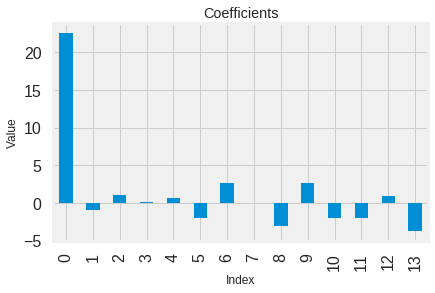

In [13]:
model = NormalModel()
model.train(X, Y)
model.score(X, Y)
model.plot_theta()

## Quadratic regression

In [5]:
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly2.fit_transform(boston.data)
X_poly2 = feature_normalize(X_poly2)

Mape: 09.37%
MSS:  5.98


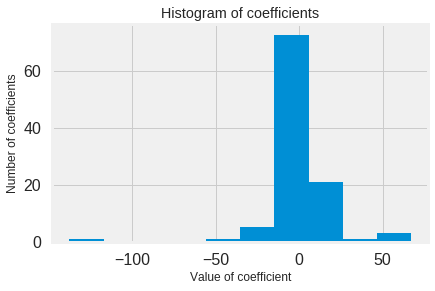

In [6]:
model = NormalModel()
model.train(X_poly2, Y)
model.score(X_poly2, Y)
model.hist_theta()

## Cubic Regression

In [7]:
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly3 = poly3.fit_transform(boston.data)
X_poly3 = feature_normalize(X_poly3)

In [8]:
X_poly3.shape

(506, 559)

Mape: 01.34%
MSS:  0.21


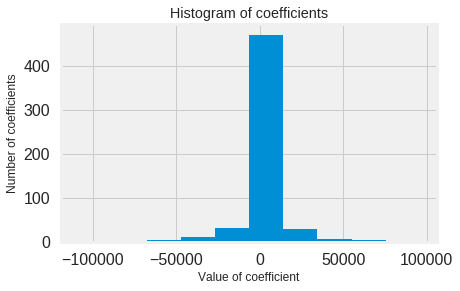

In [9]:
model = NormalModel()
model.train(X_poly3, Y)
model.score(X_poly3, Y)
model.hist_theta()

# Exercises
Your task is to extend and improve the above notebook. Do not provide a list with answers, but answer these questions within the above notebook.

You are free to change code, to add explanations, and to add plots, and even re-organize the sections; everything to make it a better read. If you don't know how to add text, headers, etc in Jupyter notebooks, you find some useful links on the Python preparation page. Presentation will be an important part of the score for this assignment.   

You can write your notebook in Dutch or English.


## Polynomial regression
1. Comment, somewhere in the notebook, on the number of features for the different orders of the polynomial regression.
1. Also explain how the polynomial terms are constructed. 

## Validation set
We need to split our data into a train and validation set in order to check if we are not overfitting. As a model becomes more flexible it becomes more likely to overfit. Indeed we see that the polynomial regression shows increasingly high MAPE with an increasing polynomial order.
1. Split the data into a validation set and a train set. You can find an example in the slides on the Boston housing data.
1. Train the model on the training set and evaluate it on the validation set. Do this for all the examples (linear, polynomial, quadratic, cubic) in the above notebook.
1. Present in your notebook a table with train and validation scores [Markdown table](http://www.tablesgenerator.com/markdown_tables) is a tool that can help you creating tables. Double click on this cell to see how the below example table is made
1. What do you observe? Add some comments in the notebook. Do you see evidence for overfitting?

| **Model**  | **Train score** | **Validation score** |
|------------|-----------------|----------------|
| Linear     |                 |                |
| Quadratic  |                 |                |
| Polynomial |                 |                |




## Ridge regression
With Ridge regression, we add to the cost function a quadratic penalty on the coefficients. During the lectures you saw that how the normal equations change as a result of this new term:
$$
 \theta = (X^\top X + \lambda \mathbb{1^0})^{-1}X^\top Y\,,
$$
where $\mathbb{1^0}$ is the unit matrix with the first diagonal element set to zero. The reason of this element being zero, is that we do not want to impose a penalty on the bias.
The matrix looks like this:

In [10]:
diagonal_zero = np.identity(X.shape[1])
diagonal_zero[0,0] = 0
diagonal_zero

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

1. Modify the class `NormalRegression` to solve the normal equations of ridge regression
2. For the polynomial degrees 1, 2 and 3, use ridge regression to find a better fit to the data. Explain in your notebook how you use the validation dataset and how you find a good value of $\lambda$. Note that polynomial degree one is nothing but the original features. It's the first case in the notebook.
3. Did you find a better hypothesis by including a regularization term?
3. What is the effect of regularization on the size of the coefficients? Explain and show this with plots in your notebook.
3. Conclude your notebook by recommending a model (hypothesis), including a value for $\lambda$ and a polynomial order. For clarity, include a table which summarizes the performance of various models and values for $lambda$

#### Example code
If you implement the regularization correctly, you get the following output. Use this as a check.

Mape: 16.43%
MSS:  21.90


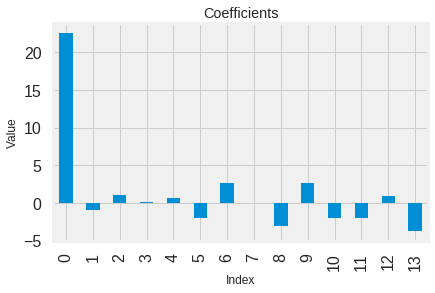

In [11]:
model = NormalModel(lambda_reg=1000000)
model.train(X, Y)
model.score(X, Y)
model.plot_theta()

# Expected output 
# Only bias is non-zero
# This amounts to constant model
# Mape: 36.25%
# MSS:  84.19%

Mape: 01.34%
MSS:  0.21


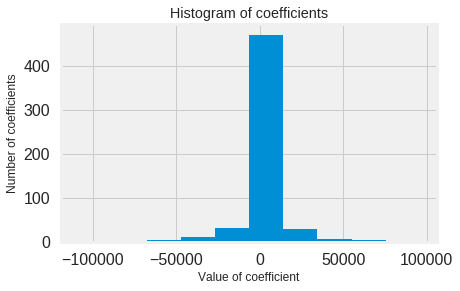

In [12]:
## Example code
model = NormalModel(lambda_reg=0.1)
model.train(X_poly3, Y)
model.score(X_poly3, Y)
model.hist_theta()

# Expected output 
# Mape: 05.87%
# MSS:  2.67
# Values of the coefficients are way smaller now